利用本周所学知识，绘制以下图形:
# Q1 在taobao_data 中，绘制不同省份的成交价格和数量(总数和均值


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import os
import seaborn as sns

In [3]:
df = pd.read_csv('taobao_data.csv')
df.head()

,宝贝,价格,成交量,卖家,位置
0,新款中老年女装春装雪纺打底衫妈妈装夏装中袖宽松上衣中年人t恤,99.0,16647,夏奈凤凰旗舰店,江苏
1,中老年女装清凉两件套妈妈装夏装大码短袖T恤上衣雪纺衫裙裤套装,286.0,14045,夏洛特的文艺,上海
2,母亲节衣服夏季妈妈装夏装套装短袖中年人40-50岁中老年女装T恤,298.0,13458,云新旗舰店,江苏
3,母亲节衣服中老年人春装女40岁50中年妈妈装套装夏装奶奶装两件套,279.0,13340,韶妃旗舰店,浙江
4,中老年女装春夏装裤大码 中年妇女40-50岁妈妈装夏装套装七分裤,59.0,12939,千百奈旗舰店,江苏


In [5]:
dfg = df.groupby('位置')

In [8]:
gg = dfg[['价格', '成交量']].agg(['sum', 'mean'])

In [9]:
gg

价格                 成交量             
       sum        mean     sum         mean
位置                                         
上海  1612.0  161.200000   68015  6801.500000
北京   900.0  150.000000   27116  4519.333333
广东   326.0  326.000000    5164  5164.000000
江苏  9838.9  223.611364  309360  7030.909091
河北   456.0  152.000000   18152  6050.666667
河南   119.0  119.000000    5986  5986.000000
浙江  8132.0  290.428571  161826  5779.500000
湖北  1783.0  254.714286   43274  6182.000000

In [17]:
gg['位置'] = gg.index

In [10]:
gg.columns

MultiIndex(levels=[['价格', '成交量'], ['sum', 'mean']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [11]:
gg[('价格', 'sum')]

位置
上海    1612.0
北京     900.0
广东     326.0
江苏    9838.9
河北     456.0
河南     119.0
浙江    8132.0
湖北    1783.0
Name: (价格, sum), dtype: float64

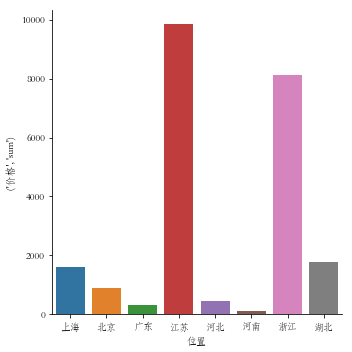

In [18]:
sns.catplot('位置', ('价格', 'sum'), kind='bar', data=gg)

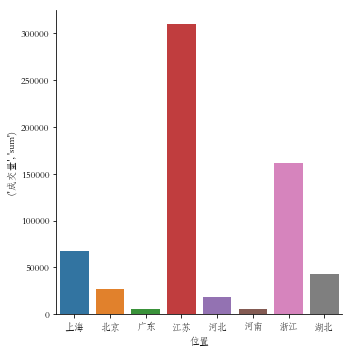

In [19]:
sns.catplot('位置', ('成交量', 'sum'), kind='bar', data=gg)

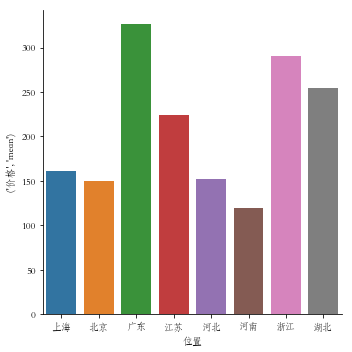

In [21]:
sns.catplot('位置', ('价格', 'mean'), kind='bar', data=gg)

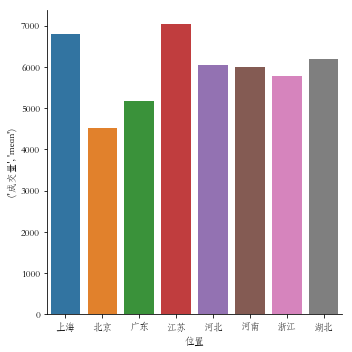

In [20]:
sns.catplot('位置', ('成交量', 'mean'), kind='bar', data=gg)

# Q2 在朝阳医院数据，绘制销售数量和应收金额的关系。在不同的月份，绘制销售数量和应收金额的关系

In [22]:
df = pd.read_excel('朝阳医院2018年销售数据.xlsx')
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [23]:
df['购药日期'] = df['购药时间'].str.split(' ').str.get(0)
df = df[df['购药日期']!='2018-02-29']
df['购药日期'] = pd.to_datetime(df['购药时间'].str.split(' ').str.get(0), format='%Y-%m-%d')
df.set_index('购药日期', inplace=True)
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
购药日期,,,,,,,
2018-01-01,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
2018-01-02,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2018-01-06,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
2018-01-11,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
2018-01-15,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [33]:
df['month'] = df.index.month

In [34]:
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,month
购药日期,,,,,,,,
2018-01-01,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00,1.0
2018-01-02,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64,1.0
2018-01-06,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00,1.0
2018-01-11,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00,1.0
2018-01-15,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00,1.0


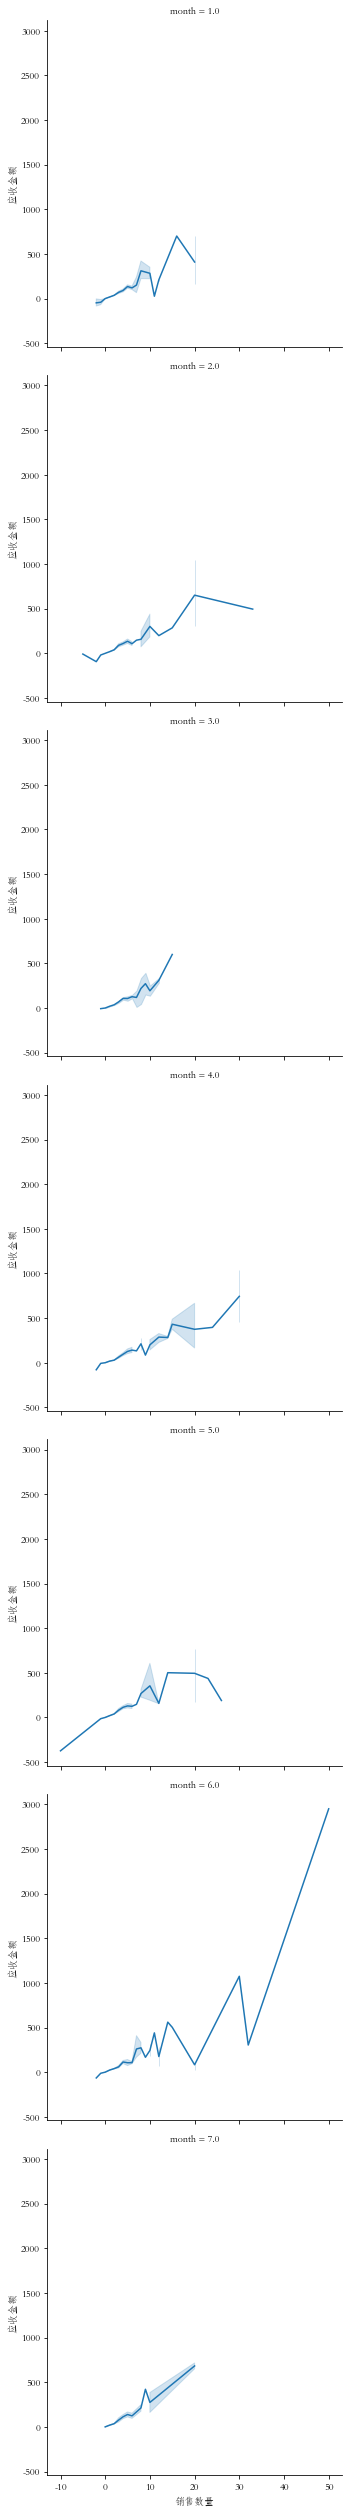

In [37]:
sns.relplot('销售数量', '应收金额', data=df, kind='line', row='month')